# Wrangling the Billboard Top 100

Consider the data in `billboard.csv` containing every song to appear on the weekly `Billboard Top 100` chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

* performer: who performed the song
* song: the title of the song
* year: year (1958 to 2021)
* week: chart week of that year (1, 2, etc)
* week_position: what position that song occupied that week on the Billboard top 100 chart.
Use your skills in data wrangling and plotting to answer the following three questions.

__Part A:__ Make a table of the top 10 most popular songs since 1958, as measured by the *total number of weeks* that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have **10 rows** and **3 columns**: `performer`, `song`, and `count`, where `count` represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the `count` variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both `performer` and `song` in any `group_by` operations, to account for the fact that multiple unique songs can share the same title.)

In [1]:
#Importing the required libraries for data wrangling
import pandas as pd
from pandas import Series, DataFrame
from tabulate import tabulate
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loading the dataset
billboard = pd.read_csv('C:/Users/krish/Downloads/billboard.csv')

#Selecting the required columns and sorting them by year
bill_board = billboard[['performer', 'song', 'year', 'week', 'week_position']]

#Printing the top 10 rows of the table
bill_board.sort_values(by = ['year', 'week'])[:10]

,performer,song,year,week,week_position
330,Nat King Cole,Come Closer To Me (Acercate Mas),1958,31,53
944,Ricky Nelson,Poor Little Fool,1958,31,1
964,Perez Prado And His Orchestra,Patricia,1958,31,2
980,Bobby Darin,Splish Splash,1958,31,3
1010,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouser,1958,31,6
1293,The Honeycones,Op,1958,31,69
1385,The Playmates,Don't Go Home,1958,31,70
1839,Bobby Day,Over And Over,1958,31,60
2304,The Danleers,One Summer Night,1958,31,16
2365,Bobby Freeman,Do You Want To Dance,1958,31,20


In [3]:
#Find the top 10 most popular songs by the number of weeks it appeared in the Billboard top 100 list
popular_songs = bill_board.groupby(['song', 'performer'])[['week']].agg('count')
popular_songs = popular_songs.rename(columns = {'week':'count'}).sort_values(by = 'count', ascending = False)
popular_songs.style.set_table_attributes("style='display:inline'").set_caption('Top 10 Most Popular Songs')
popular_songs.reset_index()[:10]

,song,performer,count
0,Radioactive,Imagine Dragons,87
1,Sail,AWOLNATION,79
2,I'm Yours,Jason Mraz,76
3,Blinding Lights,The Weeknd,76
4,How Do I Live,LeAnn Rimes,69
5,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
6,Counting Stars,OneRepublic,68
7,Foolish Games/You Were Meant For Me,Jewel,65
8,Rolling In The Deep,Adele,65
9,Before He Cheats,Carrie Underwood,64


__Part B:__ Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the *number of unique songs that appeared in the Billboard Top 100 that year*. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, *irrespective of how many times* it had appeared.

In [4]:
#Selecting the songs from 1959 to 2020 and sorting them by week and year
songs_1959_2020 = bill_board[(bill_board['year'] != 1958) & (bill_board['year'] != 2021)]
songs_1959_2020.sort_values(by = ['year', 'week'])[:10]

,performer,song,year,week,week_position
3496,Dion & The Belmonts,Don't Pity Me,1959,1,40
4316,The Nu Tornados,Philadelphia U.S.A.,1959,1,28
7150,Annette With The Afterbeats,Tall Paul,1959,1,98
14393,The Tommy Dorsey Orchestra,Tea For Two Cha Cha,1959,1,68
14423,The DeCastro Sisters,Teach Me Tonight Cha Cha,1959,1,89
16103,Quaker City Boys,Teasin',1959,1,58
16437,Earl Grant,The End,1959,1,49
16524,Ray Anthony and His Orchestra,Peter Gunn,1959,1,78
17581,Bobby Helms,The Fool And The Angel,1959,1,75
17911,The Four Lads,The Girl On Page 44,1959,1,83


In [5]:
#Finding the number of weeks for each year that a song appeared in the Billboard top 100 list 
songs_by_year = songs_1959_2020.groupby(['year', 'song', 'performer'])[['week']].agg('count')
songs_by_year = songs_by_year.rename(columns = {'week' : 'count'})
songs_by_year = songs_by_year.reset_index()
songs_by_year[:10]

,year,song,performer,count
0,1959,"""Yep!""",Duane Eddy His Twangy Guitar And The Rebels,9
1,1959,('til) I Kissed You,The Everly Brothers,16
2,1959,(All of a Sudden) My Heart Sings,Paul Anka,15
3,1959,(I Don't Care) Only Love Me,Steve Lawrence,4
4,1959,(I Wanna) Dance With The Teacher,The Olympics,3
5,1959,(I'll Be With You In) Apple Blossom Time,Tab Hunter,11
6,1959,"(If You Cry) True Love, True Love",The Drifters,9
7,1959,(New In) The Ways Of Love,Tommy Edwards,7
8,1959,(Night Time Is) The Right Time,Ray Charles with the Raylettes,1
9,1959,(Now and Then There's) A Fool Such As I,Elvis Presley With The Jordanaires,15


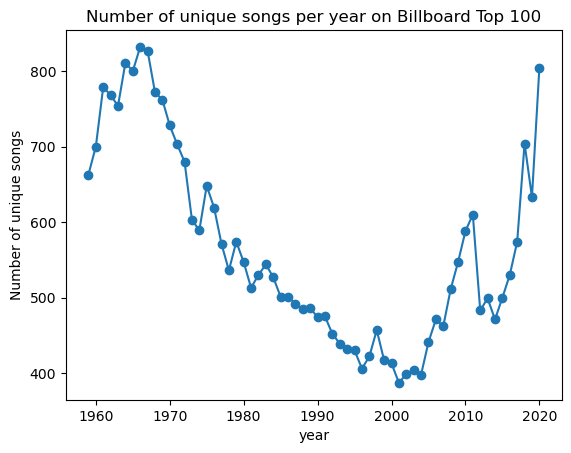

In [6]:
# Displaying the graph of number of unique songs appeared in the Billboard top 100 list per year from 1959 to 2020 
#unique_songs_by_year = songs_1959_2020[['year', 'song', 'performer']].drop_duplicates().groupby('year')[['song']].agg('count')
unique_songs_by_year = songs_by_year.groupby('year')[['song']].agg('count').reset_index()
unique_songs_by_year = unique_songs_by_year.rename(columns = {'song' : 'unique_songs'})

plot(unique_songs_by_year['year'], unique_songs_by_year['unique_songs'], marker = 'o', linestyle = '-')
xlabel('year')
ylabel('Number of unique songs')
title('Number of unique songs per year on Billboard Top 100')
show()

__Part C:__ Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had *at least 30 songs* that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

*Notes:*

1. You might find this easier to accomplish in two distinct sets of data wrangling steps.
2. Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a `coord_flip()` layer to your plot to make the bars (and labels) run horizontally instead.
3. By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the `fct_reorder` function, described in this blog post. This is optional.

In [7]:
#Finding the ten week hits for each year from 1959 to 2020
ten_week_hits = songs_by_year[songs_by_year['count'] >= 10]
ten_week_hits[:10]

,year,song,performer,count
1,1959,('til) I Kissed You,The Everly Brothers,16
2,1959,(All of a Sudden) My Heart Sings,Paul Anka,15
5,1959,(I'll Be With You In) Apple Blossom Time,Tab Hunter,11
9,1959,(Now and Then There's) A Fool Such As I,Elvis Presley With The Jordanaires,15
10,1959,(Seven Little Girls) Sitting In The Back Seat,Paul Evans and the Curls,16
11,1959,16 Candles,The Crests,15
13,1959,A Big Hunk O' Love,Elvis Presley With The Jordanaires,14
14,1959,A Boy Without A Girl,Frankie Avalon,14
20,1959,A Lover's Question,Clyde McPhatter,12
23,1959,A Teenager In Love,Dion & The Belmonts,15


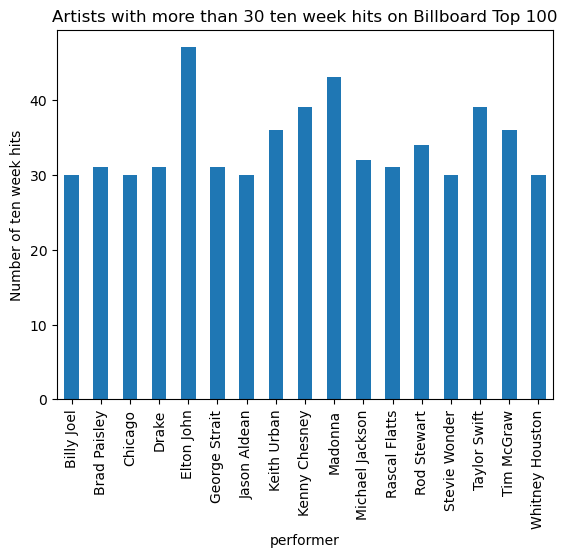

In [10]:
#Displaying the artists with more than 30 ten week hits from 1959 to 2020
artists = ten_week_hits.groupby(['performer'])[['song']].agg('count')
popular_artists = artists[artists['song'] >= 30]
popular_artists.plot(kind = 'bar', legend = None)
xlabel('performer')
ylabel('Number of ten week hits')
title('Artists with more than 30 ten week hits on Billboard Top 100')
#fig.bar_label(fig.containers[0], label_type='edge')
show()

In [11]:
#There are only 16 artists with more than 30 ten week hits from 1959 to 2020. But, it was mentioned that there are 19 artists.This is just to check.
temp1 = bill_board.groupby(['year', 'song', 'performer'])[['week']].agg('count')
temp1 = temp1.rename(columns = {'week' : 'count'})
temp1 = temp1.reset_index()
temp2 = temp1[temp1['count'] >= 10]
temp3 = temp2.groupby(['performer'])[['song']].agg('count')
temp4 = temp3[temp3['song'] >= 30].reset_index()
temp4

,performer,song
0,Billy Joel,30
1,Brad Paisley,31
2,Chicago,30
3,Drake,32
4,Elton John,47
5,George Strait,31
6,Jason Aldean,30
7,Keith Urban,36
8,Kenny Chesney,39
9,Madonna,43


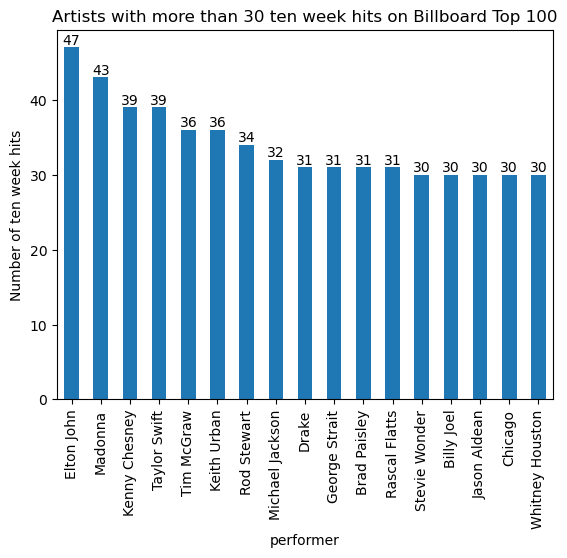

In [9]:
#Displaying artists with more than 30 ten week hits from 1959 to 2020 in descending order of number of ten week hits.
temp5 = popular_artists.sort_values(by = 'song', ascending = False)
fig = temp5.plot(kind = 'bar', legend = None)
xlabel('performer')
ylabel('Number of ten week hits')
title('Artists with more than 30 ten week hits on Billboard Top 100')
fig.bar_label(fig.containers[0], label_type='edge')
show()